In [1]:
Retail=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\10. Forecasting Basics\\14.2 retail_clean.csv',parse_dates=True)

Retail.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [123]:
Retail.describe()

,Unnamed: 0,Invoice,Quantity,Price,Customer ID,Revenue
count,7.794950e+05,779495.000000,779495.000000,779495.000000,779495.000000,779495.000000
mean,5.315660e+05,537427.005391,13.507085,3.218199,15320.262918,22.289821
std,3.110433e+05,26901.961110,146.540284,29.674823,1695.722988,227.416962
min,0.000000e+00,489434.000000,1.000000,0.000000,12346.000000,0.000000
25%,2.598405e+05,514483.000000,2.000000,1.250000,13971.000000,4.950000
50%,5.071680e+05,536754.000000,6.000000,1.950000,15246.000000,12.480000
75%,8.114895e+05,562002.000000,12.000000,3.750000,16794.000000,19.800000
max,1.067370e+06,581587.000000,80995.000000,10953.500000,18287.000000,168469.600000


In [124]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [125]:
Retail['InvoiceDate']=pd.to_datetime(Retail['InvoiceDate'])

<IPython.core.display.Javascript object>

In [126]:
Retail['Date']=Retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [127]:
Retail['Date']=pd.to_datetime(Retail['Date'])

<IPython.core.display.Javascript object>

In [128]:
Retail['Date']

0        2009-12-01
1        2009-12-01
2        2009-12-01
3        2009-12-01
4        2009-12-01
            ...    
779490   2011-12-09
779491   2011-12-09
779492   2011-12-09
779493   2011-12-09
779494   2011-12-09
Name: Date, Length: 779495, dtype: datetime64[ns]

In [129]:
Retail['Week']=Retail['Date'].dt.week
Retail['Year']=Retail['Date'].dt.year
Retail['Month']=Retail['Date'].dt.month

<ipython-input-129-34353bdb8ad7>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Retail['Week']=Retail['Date'].dt.week


In [204]:
Time_series=Retail.groupby(['Week','Month','Year']).agg(Date=('Date','first'),
                                                       total_sales=('Quantity',np.sum)).reset_index().sort_values('Date')

<IPython.core.display.Javascript object>

In [131]:
Time_series

,Week,Month,Year,Date,total_sales
113,49,12,2009,2009-12-01,138612
116,50,12,2009,2009-12-07,109644
118,51,12,2009,2009-12-14,125772
120,52,12,2009,2009-12-21,24680
0,1,1,2010,2010-01-04,95950
...,...,...,...,...,...
106,46,11,2011,2011-11-14,156756
108,47,11,2011,2011-11-21,154179
110,48,11,2011,2011-11-28,78241
112,48,12,2011,2011-12-01,61655


In [205]:
Time_series['Trend']=range(Time_series.shape[0])

In [133]:
Time_series['Week']=Time_series['Week'].astype('category')

In [134]:
X=Time_series[['Trend','Week']]

In [136]:
y=Time_series['total_sales'].values

In [137]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [138]:
from sklearn.linear_model import LinearRegression

In [139]:
from sklearn.metrics import mean_squared_error

In [140]:
model=LinearRegression()

In [141]:
model.fit(X,y)

LinearRegression()

In [142]:
pred=model.predict(X)

In [143]:
mean_squared_error(y,pred)

687862405.712021

In [144]:
np.sqrt(mean_squared_error(y,pred))

<IPython.core.display.Javascript object>

26227.131099531663

In [146]:
Time_series['Forecast']=pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

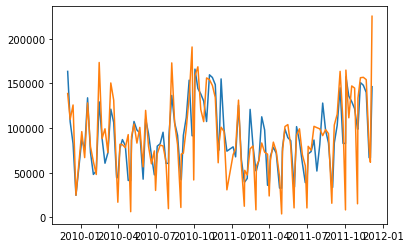

In [149]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [152]:
Time_series['Date'].max()

Timestamp('2011-12-05 00:00:00')

In [160]:
A=pd.DataFrame({'Date':pd.date_range('2011-12-06','2014-12-06',freq='W')})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
A

,Date
0,2011-12-11
1,2011-12-18
2,2011-12-25
3,2012-01-01
4,2012-01-08
...,...
151,2014-11-02
152,2014-11-09
153,2014-11-16
154,2014-11-23


In [166]:
Time_series=pd.concat([Time_series,A],axis=0)

<IPython.core.display.Javascript object>

In [168]:
Time_series['Week']=Time_series['Date'].dt.week

<ipython-input-168-d84a5d68c514>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  Time_series['Week']=Time_series['Date'].dt.week


In [170]:
Time_series['Trend']=range(Time_series.shape[0])

In [171]:
Time_series

,Week,Month,Year,Date,total_sales,Trend,Forecast
113,49,12.0,2009.0,2009-12-01,138612.0,0,163373.609283
116,50,12.0,2009.0,2009-12-07,109644.0,1,107122.935316
118,51,12.0,2009.0,2009-12-14,125772.0,2,82485.435316
120,52,12.0,2009.0,2009-12-21,24680.0,3,24680.000000
0,1,1.0,2010.0,2010-01-04,95950.0,4,87184.631328
...,...,...,...,...,...,...,...
151,44,NaN,NaN,2014-11-02,NaN,272,NaN
152,45,NaN,NaN,2014-11-09,NaN,273,NaN
153,46,NaN,NaN,2014-11-16,NaN,274,NaN
154,47,NaN,NaN,2014-11-23,NaN,275,NaN


In [182]:
Time_series['Week']=Time_series['Week'].astype('category')

In [183]:
X=Time_series[['Trend','Week']]

In [184]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [187]:
pred=model.predict(X)

In [189]:
Time_series['Forecast']=pred

In [190]:
Time_series

,Week,Month,Year,Date,total_sales,Trend,Forecast
113,49,12.0,2009.0,2009-12-01,138612.0,0,163373.609283
116,50,12.0,2009.0,2009-12-07,109644.0,1,107122.935316
118,51,12.0,2009.0,2009-12-14,125772.0,2,82485.435316
120,52,12.0,2009.0,2009-12-21,24680.0,3,24680.000000
0,1,1.0,2010.0,2010-01-04,95950.0,4,87184.631328
...,...,...,...,...,...,...,...
151,44,NaN,NaN,2014-11-02,NaN,272,76027.041476
152,45,NaN,NaN,2014-11-09,NaN,273,128313.896370
153,46,NaN,NaN,2014-11-16,NaN,274,125334.896370
154,47,NaN,NaN,2014-11-23,NaN,275,117281.896370


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

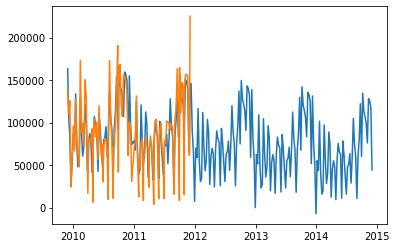

In [191]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [206]:
Time_series['Week']=Time_series['Week'].astype('category')
Time_series['Month']=Time_series['Month'].astype('category')

In [207]:
X=Time_series[['Trend','Week','Month']]

In [208]:
y=Time_series['total_sales'].values

In [209]:
X=pd.get_dummies(X).values

<IPython.core.display.Javascript object>

In [210]:
model.fit(X,y)

LinearRegression()

In [211]:
pred=model.predict(X)

In [212]:
mean_squared_error(y,pred)

318071404.07337546

In [213]:
Time_series['Forecast']=pred

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

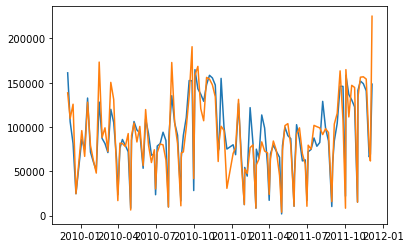

In [214]:
plt.plot(Time_series['Date'],Time_series['Forecast'],label="forecast")
plt.plot(Time_series['Date'],Time_series['total_sales'],label='Actuals')

In [2]:
# ARIMA FORECASTING METHOD

In [1]:
# ARIMA

In [30]:
# moving average

In [31]:
pip install matplotlib

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires seaborn>=0.10.1, which is not installed.
missingno 0.5.1 requires seaborn, which is not installed.


In [32]:
import warnings
import itertools
import matplotlib.pyplot as plt

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
phik 0.12.2 requires matplotlib>=2.2.3, which is not installed.
pandas-profiling 3.2.0 requires matplotlib>=3.2.0, which is not installed.
pandas-profiling 3.2.0 requires seaborn>=0.10.1, which is not installed.
missingno 0.5.1 requires matplotlib, which is not installed.
missingno 0.5.1 requires seaborn, which is not installed.
inventorize 1.1.9 requires scikit-learn, which is not installed.
imagehash 4.2.1 requires PyWavelets, which is not installed.


In [12]:
import statsmodels.api as sm

In [13]:
Retail=pd.read_csv('C:\\documents\\study material\\data science\\supply chain\\Udemy - RA Data Science and Supply Chain analytics. A-Z with Python 2020-9\\10. Forecasting Basics\\14.2 retail_clean.csv',parse_dates=True)

Retail.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [14]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779495 entries, 0 to 779494
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   779495 non-null  int64  
 1   Invoice      779495 non-null  int64  
 2   StockCode    779495 non-null  object 
 3   Description  779495 non-null  object 
 4   Quantity     779495 non-null  int64  
 5   InvoiceDate  779495 non-null  object 
 6   Price        779495 non-null  float64
 7   Customer ID  779495 non-null  float64
 8   Country      779495 non-null  object 
 9   Revenue      779495 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.5+ MB


In [15]:
Retail['InvoiceDate']=pd.to_datetime(Retail['InvoiceDate'])

<IPython.core.display.Javascript object>

In [17]:
Retail['date']=Retail['InvoiceDate'].dt.strftime('%Y-%m-%d')

In [18]:
Retail['date']=pd.to_datetime(Retail['date'])

<IPython.core.display.Javascript object>

In [19]:
Retail['Week']=Retail['date'].dt.week
Retail['Year']=Retail['date'].dt.year
Retail['Month']=Retail['date'].dt.month

C:\Users\njjanaki\AppData\Local\Temp\ipykernel_8180\126621322.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Retail['Week']=Retail['date'].dt.week


In [20]:
time_series=Retail.groupby(['Week','Year','Month']).agg(date=('date','first'),total_sales=('Quantity',np.sum)).reset_index().sort_values('date')

<IPython.core.display.Javascript object>

In [21]:
time_series

,Week,Year,Month,date,total_sales
113,49,2009,12,2009-12-01,138612
116,50,2009,12,2009-12-07,109644
118,51,2009,12,2009-12-14,125772
120,52,2009,12,2009-12-21,24680
0,1,2010,1,2010-01-04,95950
...,...,...,...,...,...
106,46,2011,11,2011-11-14,156756
108,47,2011,11,2011-11-21,154179
111,48,2011,11,2011-11-28,78241
112,48,2011,12,2011-12-01,61655


In [24]:
time_series=time_series.set_index('date')

In [25]:
monthly_series=time_series['total_sales'].resample('M').sum()

In [27]:
monthly_series.head()

date
2009-12-31    398708
2010-01-31    370128
2010-02-28    371871
2010-03-31    502101
2010-04-30    350604
Freq: M, Name: total_sales, dtype: int64

<AxesSubplot:xlabel='date'>

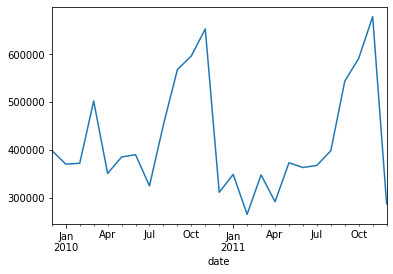

In [33]:
monthly_series.plot()

In [34]:
components=sm.tsa.seasonal_decompose(monthly_series)

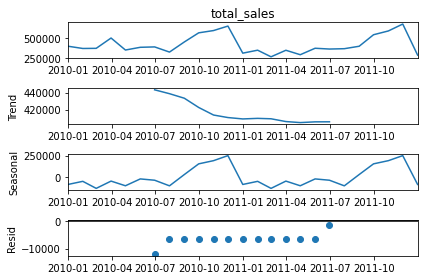

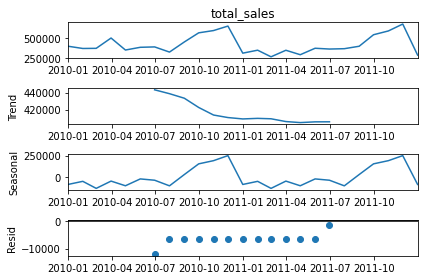

In [35]:
components.plot()

In [41]:
Trend=components.trend
Seasonality=components.seasonal
Remainder=components.resid

<AxesSubplot:xlabel='date'>

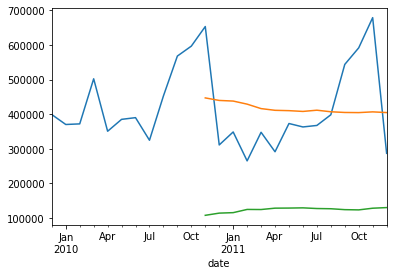

In [46]:
monthly_series.plot()
monthly_series.rolling(window=12).mean().plot()
monthly_series.rolling(window=12).std().plot()

In [49]:
ad_fuller_test=sm.tsa.stattools.adfuller(monthly_series,autolag='AIC')
ad_fuller_test

(-3.356898142962888,
 0.012518958188462936,
 2,
 22,
 {'1%': -3.769732625845229,
  '5%': -3.005425537190083,
  '10%': -2.6425009917355373},
 397.22710967925735)

In [50]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

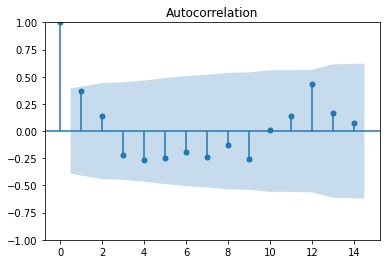

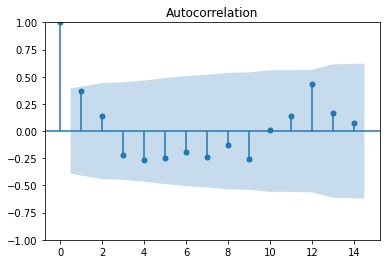

In [51]:
plot_acf(monthly_series)

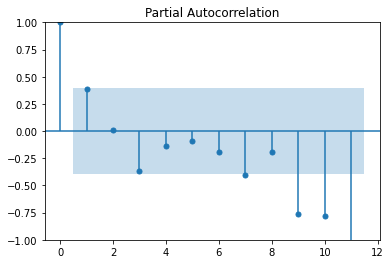

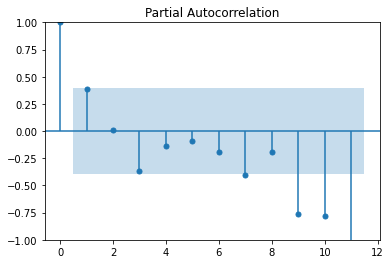

In [66]:
plot_pacf(monthly_series,lags=11)

In [67]:
# Moving average model
# auto regression
#ARIMA
#ARMA

In [73]:
model_ma=sm.tsa.statespace.SARIMAX(monthly_series,order=(0,0,1))
results_ma=model_ma.fit()
results_ma.aic

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


708.0230586495467

In [74]:
model_ar=sm.tsa.statespace.SARIMAX(monthly_series,order=(1,0,0))
results_ar=model_ar.fit()
results_ar.aic

665.3244111102928

In [75]:
model_arma=sm.tsa.statespace.SARIMAX(monthly_series,order=(1,0,1))
results_arma=model_arma.fit()
results_arma.aic

666.2593950268296

In [76]:
model_arima=sm.tsa.statespace.SARIMAX(monthly_series,order=(1,1,1))
results_arima=model_arima.fit()
results_arima.aic

638.1114103614025

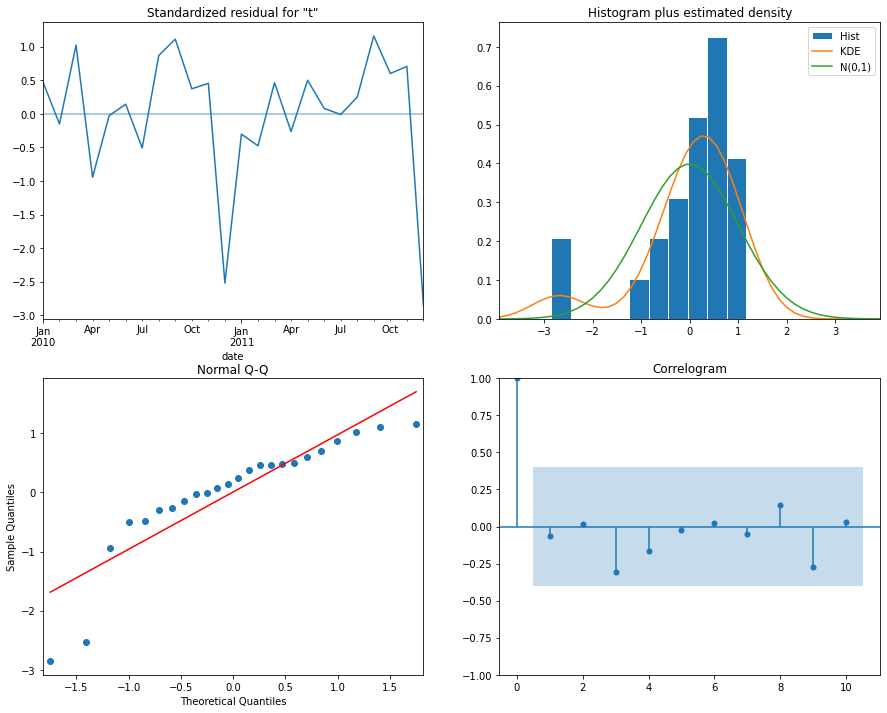

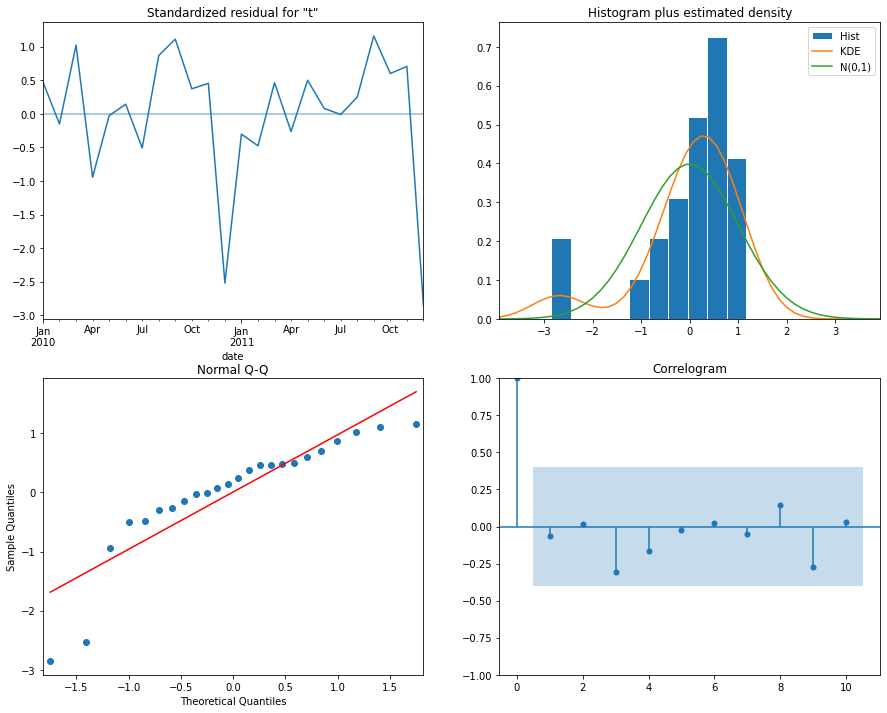

In [78]:
results_arima.plot_diagnostics(figsize=(15,12))

In [ ]:
# Grid search for best model

In [80]:
P=D=Q=p=d=q=range(0,3)
S=12

In [81]:
combinations=list(itertools.product(p,d,q,P,D,Q))

In [85]:
len(combinations)

729

In [86]:
arima_orders=[(x[0],x[1],x[2]) for x in combinations]

In [92]:
arima_orders[0]

(0, 0, 0)

In [106]:
seasonal_orders=[(x[3],x[4],x[4],S) for x in combinations]

In [108]:
seasonal_orders[0]

(0, 0, 0, 12)

In [109]:
results_data=pd.DataFrame(columns=['p','d','q','P','D','Q','AIC'])

<IPython.core.display.Javascript object>

In [115]:
for i in range(len(combinations)):
    try:
        model=sm.tsa.statespace.SARIMAX(monthly_series,order=arima_orders[i],seasonal_order=seasonal_orders[i])
        result=model.fit()
        results_data.loc[i,'p']=arima_orders[i][0]
        results_data.loc[i,'d']=arima_orders[i][1]
        results_data.loc[i,'q']=arima_orders[i][2]
        results_data.loc[i,'P']=seasonal_orders[i][0]
        results_data.loc[i,'D']=seasonal_orders[i][1]
        results_data.loc[i,'Q']=seasonal_orders[i][2]
        results_data.loc[i,'AIC']=result.aic
    except:
        continue
        

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as startin

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: i

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too fe

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Like

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-pa

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\njjanaki\Anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\njjanaki\Anaconda3\lib\site-packages\numpy\core\_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to esti

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. Al

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. Al

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stati

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization faile

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3757: RuntimeWarning: Degrees of fre

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-pa

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set t

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\njjanaki\

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [117]:
results_data.head()

,p,d,q,P,D,Q,AIC
0,0,0,0,0,0,0,722.316759
1,0,0,0,0,0,0,722.316759
2,0,0,0,0,0,0,722.316759
3,0,0,0,0,1,1,324.332882
4,0,0,0,0,1,1,324.332882


In [118]:
results_data[results_data['AIC']==min(results_data['AIC'])]

,p,d,q,P,D,Q,AIC
87,0,1,0,0,2,2,6.0
88,0,1,0,0,2,2,6.0
89,0,1,0,0,2,2,6.0
168,0,2,0,0,2,2,6.0
169,0,2,0,0,2,2,6.0
170,0,2,0,0,2,2,6.0


In [127]:
best_model=sm.tsa.statespace.SARIMAX(monthly_series,order=(0,1,0),seasonal_order=(0,2,0,12))
best_result=best_model.fit()
        

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:1234: RuntimeWarning: invalid value encountered in true_divide
  np.inner(score_obs, score_obs) /


In [128]:
fitting=best_result.get_prediction(start='2009-12-31')
fitting_mean=fitting.predicted_mean
forecast=best_result.get_forecast(steps=12)
forecast_mean=forecast.predicted_mean

<AxesSubplot:xlabel='date'>

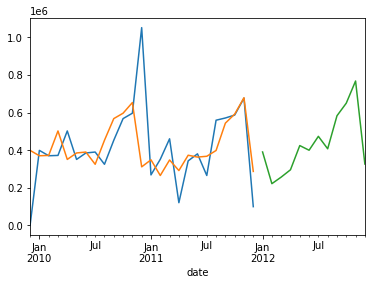

In [129]:
fitting_mean.plot(label='pred')
monthly_series.plot(label='actuals')
forecast_mean.plot(label='forecast')

In [130]:
MAE=abs(monthly_series-fitting_mean).mean()
rmse=np.sqrt((monthly_series-fitting_mean)**2).mean()
print(MAE)
print(rmse)


<IPython.core.display.Javascript object>

114693.99333333336
114693.99333333336


In [116]:
# Exponential smoothing

In [137]:
model_expo1=sm.tsa.ExponentialSmoothing(monthly_series,trend='add',seasonal='add',seasonal_periods=12)
model_expo2=sm.tsa.ExponentialSmoothing(monthly_series,trend='add',seasonal='mul',seasonal_periods=12)
model_expo3=sm.tsa.ExponentialSmoothing(monthly_series,trend='mul',seasonal='add',seasonal_periods=12)
model_expo4=sm.tsa.ExponentialSmoothing(monthly_series,trend='mul',seasonal='mul',seasonal_periods=12)

In [139]:
results1=model_expo1.fit()
results2=model_expo2.fit()
results3=model_expo3.fit()
results4=model_expo4.fit()

C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\njjanaki\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [141]:
results1.summary()


Dep. Variable:,total_sales,No. Observations:,25
Model:,ExponentialSmoothing,SSE,33968402208.601
Optimized:,True,AIC,557.746
Trend:,Additive,BIC,577.248
Seasonal:,Additive,AICC,671.746
Seasonal Periods:,12,Date:,"Sat, 16 Jul 2022"
Box-Cox:,False,Time:,22:28:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2171429,alpha,True
smoothing_trend,0.0167033,beta,True


In [142]:
results2.summary()


Dep. Variable:,total_sales,No. Observations:,25
Model:,ExponentialSmoothing,SSE,36243562040.134
Optimized:,True,AIC,559.366
Trend:,Additive,BIC,578.868
Seasonal:,Multiplicative,AICC,673.366
Seasonal Periods:,12,Date:,"Sat, 16 Jul 2022"
Box-Cox:,False,Time:,22:28:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3585714,alpha,True
smoothing_trend,0.0001,beta,True


In [143]:
results3.summary()


Dep. Variable:,total_sales,No. Observations:,25
Model:,ExponentialSmoothing,SSE,33520564959.279
Optimized:,True,AIC,557.414
Trend:,Multiplicative,BIC,576.916
Seasonal:,Additive,AICC,671.414
Seasonal Periods:,12,Date:,"Sat, 16 Jul 2022"
Box-Cox:,False,Time:,22:28:33
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2525000,alpha,True
smoothing_trend,0.0001,beta,True


In [144]:
results4.summary()

Dep. Variable:,total_sales,No. Observations:,25
Model:,ExponentialSmoothing,SSE,35816223792.382
Optimized:,True,AIC,559.070
Trend:,Multiplicative,BIC,578.572
Seasonal:,Multiplicative,AICC,673.070
Seasonal Periods:,12,Date:,"Sat, 16 Jul 2022"
Box-Cox:,False,Time:,22:28:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.3585714,alpha,True
smoothing_trend,0.0001,beta,True


In [145]:
fit1=results1.predict(0,len(monthly_series))
fit2=results2.predict(0,len(monthly_series))
fit3=results3.predict(0,len(monthly_series))
fit4=results4.predict(0,len(monthly_series))


In [146]:
mae1=abs(monthly_series-fit1).mean()
mae2=abs(monthly_series-fit2).mean()
mae3=abs(monthly_series-fit3).mean()
mae4=abs(monthly_series-fit4).mean()

In [147]:
print(mae1)
print(mae2)
print(mae3)
print(mae4)

24793.96636765775
27767.091298417094
24686.010075485174
27416.132315633207


In [148]:
forecast=results1.predict(0,len(monthly_series)+12)

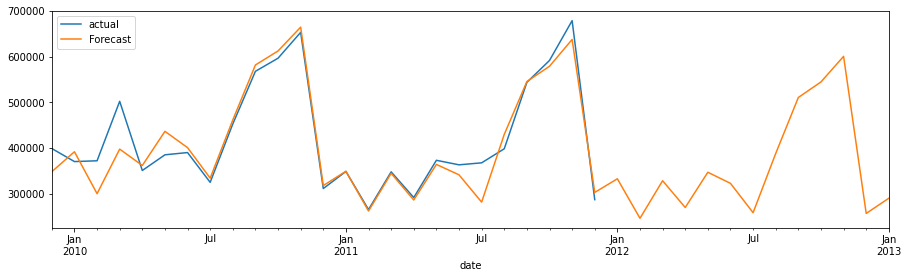

In [161]:
plt.figure(figsize=(15,4))
monthly_series.plot(label='actual')
forecast.plot(label='Forecast')
plt.legend(loc='upper left')